# Connecticut Real Estate Sales Analysis 
## YU WU

## Part 1: 
### Introduction

- CT Real Estate Sales Dataset:
  https://www.kaggle.com/datasets/derrekdevon/real-estate-sales-2001-2020/data
 
- Real Estate listings and sales from 2001-2021
- Time Series 
- Key Variables In Use:

  - Date Recorded(Year Sold)
  - Sale Amount (The actual sale price of the property)
  - Town (The town where the property is located)
  
  
 
- To analyze sales trends in CT Real Estate Market in 2001-2021

- Table Of Contents:

  - Visual 1 : Line chart & Bar chart of Average Sale Amount of Properties By Year
  - Visual 2 : Bar chart of Average Sale Price of Properties By Town (Top 15)
  - Visual 3 : Heatmap of Total Sale Amount of Properties by Year and Town (Top 15 Towns)
  - Visual 4 : Bar chart of Average Sale Price of properties By Town (Top 20) In 2020
  - Visual 5 : Bar chart of Number of Properties Sold By Town (Top 20) In 2020  


### Data Processing 

In [1]:
#Import the Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#Make sure plots display inline
%matplotlib inline
#Read in data set
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

In [2]:
#Preview the Data
df.head()


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


In [3]:
df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value        int64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Years until sold      int64
dtype: object

In [4]:
#Identify missing values 
df.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Years until sold    0
dtype: int64

In [5]:
#Identify duplicates
df.duplicated().sum()

0

In [6]:
# Check NaN values for 'Sale Amount'column
pd.to_numeric(df['Sale Amount'], errors='coerce').isna().any()

False

In [7]:
# Using process_data Function to process data

def process_data(df):
# Convert 'Date Recorded' to DateTime
    df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])
# Adjust 'List Year' Based on Condition
    condition = df['List Year'].values > df['Date Recorded'].dt.year.values
    df['List Year_1'] = np.where(condition, df['Date Recorded'].dt.year.values, df['List Year'].values)
# Create Adjusted 'Date Recorded'
    df['Date Recorded_1'] = np.where(condition, df['List Year'].astype(str) + '/' + df['Date Recorded'].dt.strftime('%m/%d'), df['Date Recorded'])
    df['Date Recorded'] = pd.to_datetime(df['Date Recorded_1'])
    df['List Year'] = df['List Year_1']
# Calculate 'Years until sold'
    df['Years until sold'] = df['Date Recorded'].dt.year.values - df['List Year'].values
# Extract 'Year Sold' and 'Month Sold'
    df['Year Sold'] = df['Date Recorded'].dt.year
    df['Month Sold'] = df['Date Recorded'].dt.month
# Drop Intermediate Columns    
    df = df.drop(['Date Recorded_1','List Year_1'],axis = 1)
    
    return df
df1 = process_data(df)
df1.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Year Sold,Month Sold
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1,2021,9
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0,2020,10
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1,2021,3
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1,2021,4
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1,2021,7


In [13]:
df1.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value               int64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Years until sold             int64
Year Sold                    int32
Month Sold                   int32
dtype: object

In [8]:
df1.describe()

,Serial Number,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Year Sold,Month Sold
count,9.972130e+05,997213.000000,997213,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000,997213.000000,997213.000000
mean,4.311864e+05,2010.189609,2011-06-19 13:32:17.646219776,2.791437e+05,3.911512e+05,1.044637e+01,0.751339,2010.940948,6.812803
min,0.000000e+00,1999.000000,2001-10-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2001.000000,1.000000
25%,3.044400e+04,2004.000000,2005-07-25 00:00:00,8.760000e+04,1.400000e+05,4.867000e-01,1.000000,2005.000000,4.000000
50%,7.030300e+04,2010.000000,2011-01-20 00:00:00,1.383900e+05,2.250000e+05,6.246000e-01,1.000000,2011.000000,7.000000
75%,1.518780e+05,2016.000000,2017-04-05 00:00:00,2.255600e+05,3.650000e+05,7.852761e-01,1.000000,2017.000000,9.000000
max,2.000500e+09,2020.000000,2021-09-30 00:00:00,8.815100e+08,5.000000e+09,1.226420e+06,18.000000,2021.000000,12.000000
std,6.549219e+06,6.237850,NaN,1.670610e+06,5.347270e+06,1.890192e+03,0.433983,6.247524,3.237718


## Part 2
### Visual 1 : Line chart & Bar chart of Average Sale Amount of Properties By Year

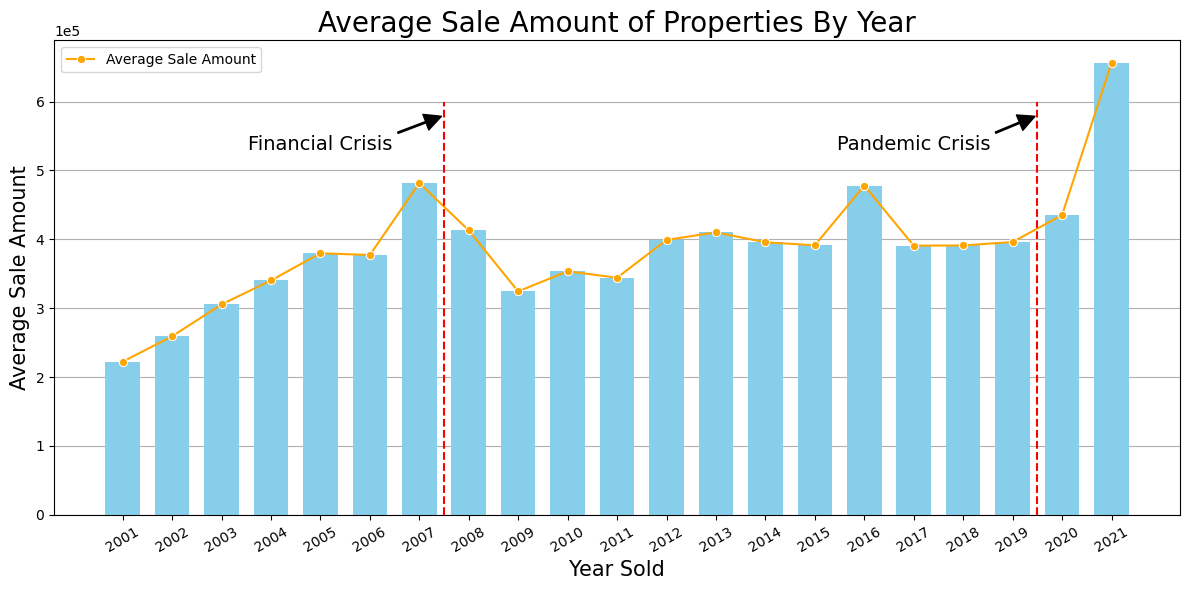

In [11]:
# creat a Line plot of Average Sale Amount of Properties by Year
year_avg_sale = df1.groupby(df1['Year Sold'])['Sale Amount'].mean()
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(x=year_avg_sale.index,
            y=year_avg_sale.values,
            label='Average Sale Amount',
            marker="o",
            color='orange',
            zorder=3,
            ax=ax)
plt.xlabel('Year Sold',fontsize=15)
plt.ylabel('Average Sale Amount',fontsize=15)
plt.title('Average Sale Amount of Properties By Year',fontsize=20)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0, 0)) 
plt.xticks(np.arange(2001, 2022, 1),rotation=30, horizontalalignment="center")
plt.grid(axis='y', zorder=0)

# create a Bar plot of Average Sale Amount Properties by Year
plt.bar(year_avg_sale.index, year_avg_sale.values,color = 'skyblue',width=0.7,zorder=2)
plt.vlines(x=[2007.5,2019.5], ymin=0, ymax=600000, colors='red', linestyles='--',zorder=4)
plt.annotate('Financial Crisis', xy=(2007.5,580000), xytext=(2005, 530000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             fontsize=14, ha='center')
plt.annotate('Pandemic Crisis', xy=(2019.5,580000), xytext=(2017, 530000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             fontsize=14, ha='center')

plt.tight_layout()
plt.show()

1.Visualization Type: Line Chart & Bar Chart

2.Intended Goal:

The charts aims to show the trend in average sale amounts of properties over the years. 

3.It answers questions such as:

 a) How does the average sale amount of properties vary over time?

 b) Are there any significant peaks or dips in the average sale amount trend?
 
  - Based on the provided visualization:
    
    There is a noticeable dip in the trend at the end of 2007.
    
    There is a peak observed at the beginning of 2020.
    
4.Further Analysis:
    Economic events or other factors might affect property sales, such as the financial crisis of 2007-2008 and the subsequent recovery, as well as the effects of the COVID-19 pandemic in early 2020.


### Visual 2 :  Bar chart of Average Sale Price of properties By Town (Top 15)¶

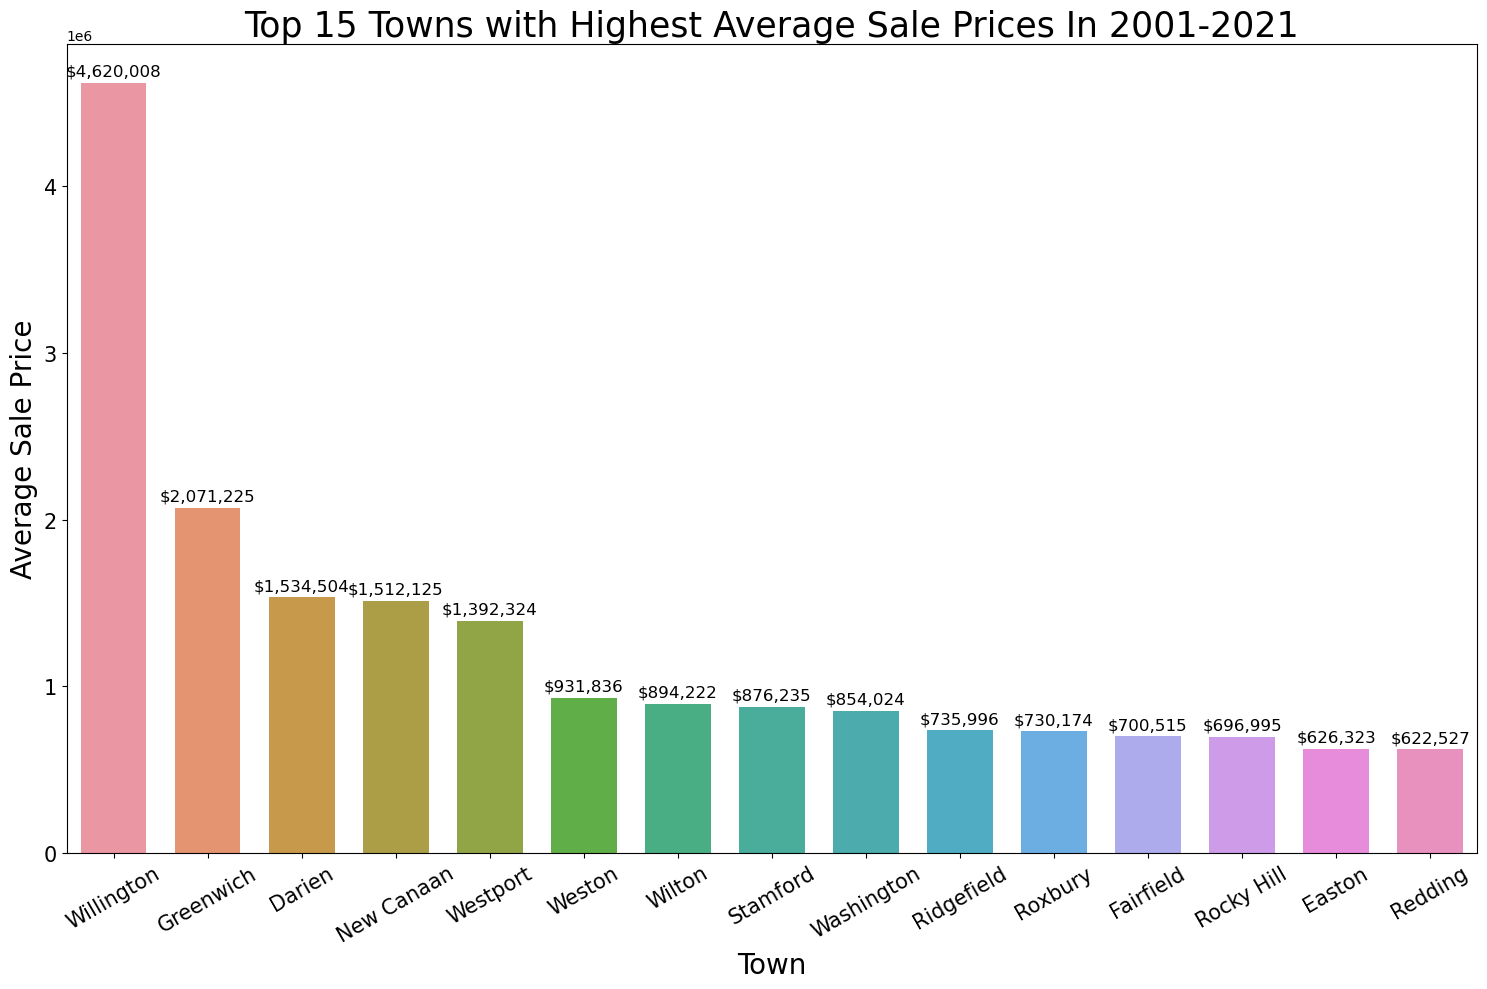

In [14]:
# create a Bar plot of Average Sale Price of properties By Town (Top 15)
top_15_avg_sale_towns = df1.groupby('Town')['Sale Amount'].mean().nlargest(15).sort_values(ascending=False)
df_top_15_towns = df1[df1['Town'].isin(top_15_avg_sale_towns.index)]

fig, ax = plt.subplots(figsize=(15,10))
bars = sns.barplot(x=top_15_avg_sale_towns.index, y=top_15_avg_sale_towns.values, data=df_top_15_towns, order=top_15_avg_sale_towns.index, label='Average Sale Price',ax=ax, width=0.7,edgecolor='none')

plt.ylabel('Average Sale Price',fontsize=20)                     
plt.xlabel('Town',fontsize=20)   
plt.title('Top 15 Towns with Highest Average Sale Prices In 2001-2021',fontsize=25)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=15)
plt.yticks(fontsize=15)


for bar in bars.patches:
    height = bar.get_height()
    ax.annotate(f'${height:,.0f}',  # Label text
                xy=(bar.get_x() + bar.get_width() / 2, height),  # Center of the bar
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

1.Visualization Type: Bar Chart

2.Intended Goal:

The bar chart aims to showcase where property prices are highest among different towns.

3.It answers questions such as:

  a) Which towns have the highest average sale prices for properties?
  
  b) Are there any noticeable differences in property prices among these top towns?
  
 - Based on the bar plot:
   
   a) The top 5 towns with the highest average sale prices for properties is:
   Willington, Greenwich, Darien, New Canaan, Westport.
   
   b) Willington is identified as the top town with significantly higher average sale prices compared to the rest of the top towns.
   
4.Further Analysis:
   
   To understand why Willington's average sale prices are significantly higher compared to other top towns, we can create a heatmap of the total sale amount trend over time for the top towns. This will allow us to observe Willington's yearly total sale amount of properties relative to other towns. 
   

### Visual 3 : Heatmap of Total Sale Amount of Properties by Year and Town

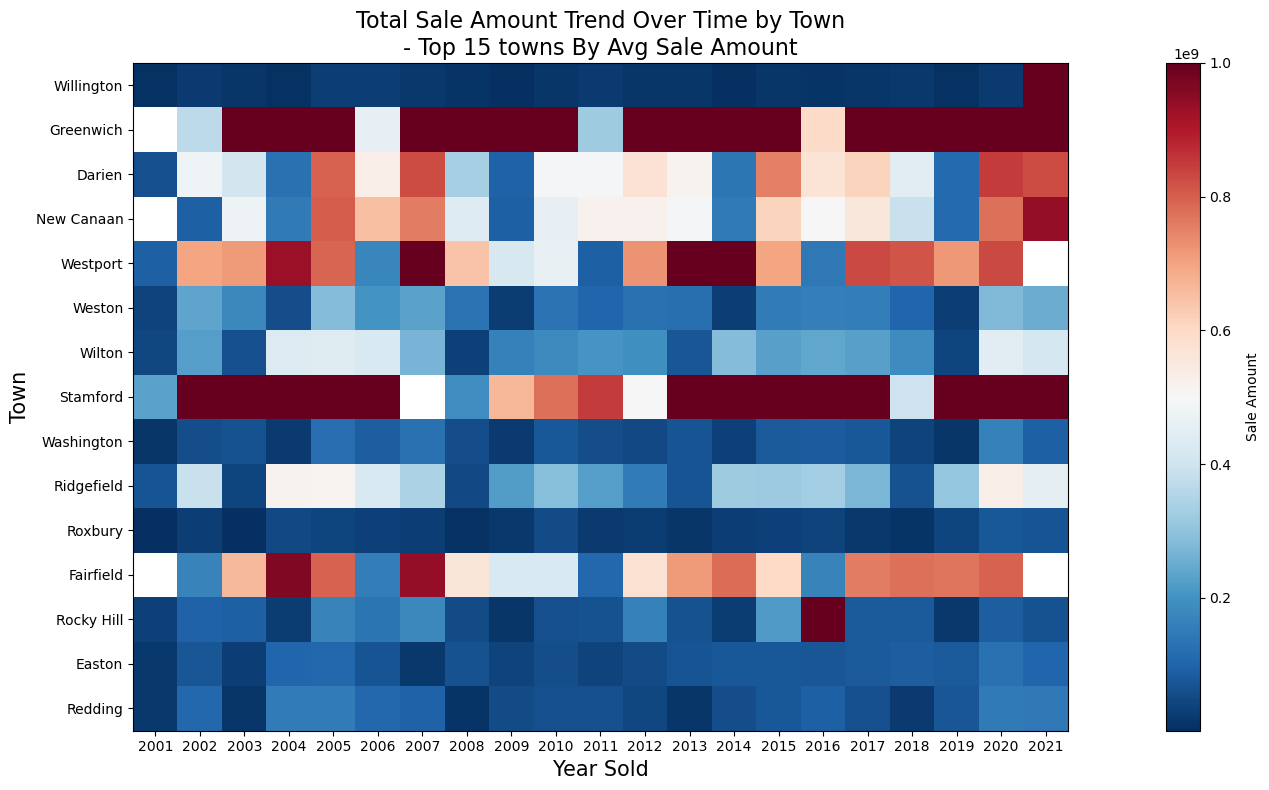

In [15]:
# Create the heatmap plot of Total Sale Amount of Properties by Year and Town
avg_sale_amount_by_town = df1.groupby('Town')['Sale Amount'].mean().reset_index()
avg_sale_amount_by_town_sorted = avg_sale_amount_by_town.sort_values(by='Sale Amount', ascending=False)
top_15_avg_sale_towns = avg_sale_amount_by_town_sorted.head(15)['Town'].tolist()
top_15_avg_sale_towns_data = df1[df1['Town'].isin(top_15_avg_sale_towns)]
sales_by_town_year = top_15_avg_sale_towns_data.groupby(['Year Sold', 'Town'])['Sale Amount'].sum().reset_index()
heatmap_data = sales_by_town_year.pivot(index='Town', columns='Year Sold', values='Sale Amount')
heatmap_data = heatmap_data.loc[top_15_avg_sale_towns]
fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(heatmap_data,cmap='RdBu_r')

ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticklabels(heatmap_data.index)
ax.set_xlabel('Year Sold', fontsize=15)
ax.set_ylabel('Town', fontsize=15)

main_title = "Total Sale Amount Trend Over Time by Town"
subtitle = "- Top 15 towns By Avg Sale Amount"
ax.set_title(f"{main_title}\n{subtitle}", fontsize=16)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.set_label('Sale Amount', rotation=90, labelpad=10)
im.set_clim(vmin=1200000, vmax=1000000000)

fig.tight_layout()
plt.show()



1.Visualization Type: Heat Map

2.Intended Goal:

The heatmap aims to identify how the total sale amounts vary yearly across different towns, especially focusing on the top 15 performers by average sale amount.

3.It answers questions such as: 
 
  a) How does the total sale amount in Willington (and other top towns) compare to each other yearly?
  
  b) Which towns among the top 15 by average sale amount have consistently high total sale amounts over the years?
    
  - Based on the heatmap:
    
    a) The total sale amount in Willington is lower at most of the years but is extremely high in 2021. 
    It reveals that in most years leading up to 2021, Willington generally shows lower total sale amounts compared to other top towns. However, there is a significant spike in total sale amount observed in 2021 for Willington.
    
    b) The rest of the top 5 towns have consistently high total sale amounts over the years. 
    It indicates that the other towns ranked in the top 5 exhibit consistently high total sale amounts across multiple years. This consistency suggests robust performance in property sales over time.
    
    c)Addtionally, stamford which is not in the top 5 towns has strong performance. 
    
4.Further Analysis:

   Although not among the top 5 towns by average sale amount, Stamford stands out for its strong performance in total sale amounts. 
   This indicates that Stamford has notable sales activity, despite its ranking. 

## Part 3 : 
### Next steps
**1.Create a bar chart of Average Sale Price of properties By Town in 2020-2021 and a bar chart of Number of Properties Sold By Town in 2020-2021, to observe the top towns' sales activities.**

### Visual 4 : Bar chart of Average Sale Price of properties By Town (Top 20) In 2020

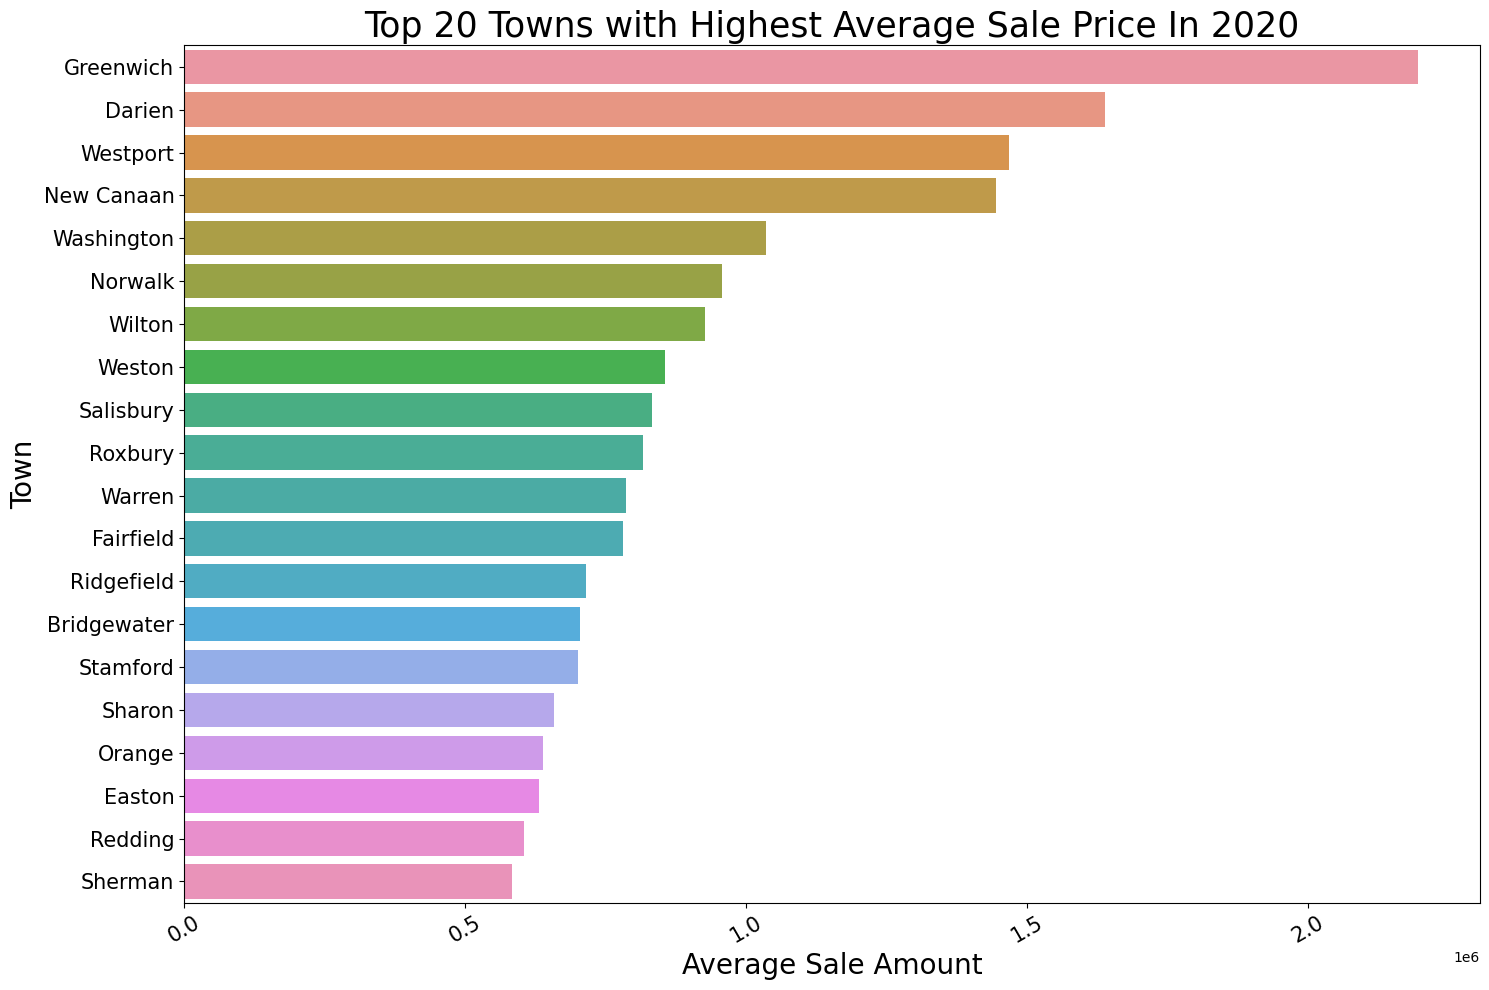

In [16]:
# create a Bar plot of Average Sale Price of properties By Town (Top 20) In 2020
sales_2020 = df1[df1['Year Sold']== 2020]
property_avg_sale_2020 = sales_2020.groupby(['Town'])['Sale Amount'].mean()
top_20_avg_sale_towns = property_avg_sale_2020.nlargest(20)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=top_20_avg_sale_towns.values, y=top_20_avg_sale_towns.index, data=df1)

plt.ylabel('Town',fontsize=20)                     
plt.xlabel('Average Sale Amount',fontsize=20)   
plt.title('Top 20 Towns with Highest Average Sale Price In 2020',fontsize=25)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


### Visual 5 : Bar chart of Number of Properties Sold By Town (Top 20) In 2020

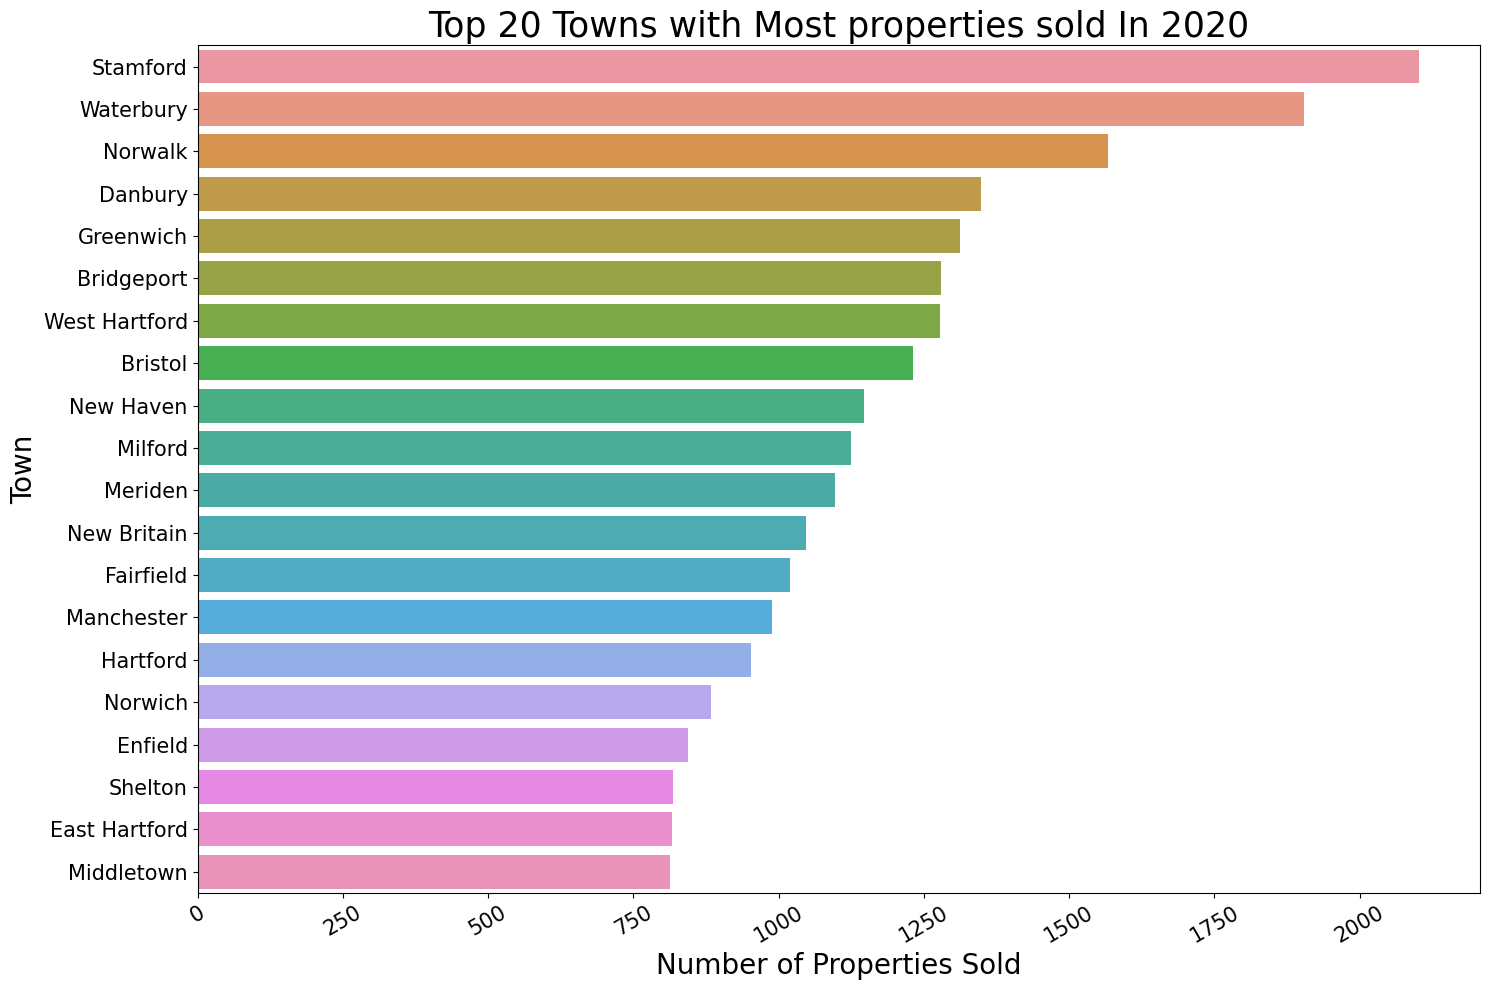

In [17]:
# create a Bar plot of Number of Properties Sold By Town (Top 20) In 2020
sales_2020 = df1[df1['Year Sold']== 2020]
property_sale_count_2020 = sales_2020['Town'].value_counts()
top_20_sale_towns = property_sale_count_2020.nlargest(20)
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=top_20_sale_towns.values, y=top_20_sale_towns.index, data=df1)
plt.ylabel('Town',fontsize=20)                     
plt.xlabel('Number of Properties Sold',fontsize=20)   
plt.title('Top 20 Towns with Most properties sold In 2020',fontsize=25)
plt.xticks(rotation=30, horizontalalignment="center",fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

**2.Conduct a deeper dive into the reasons behind the consistent high performance of the top 5 towns in total sale amounts. Compare this with Stamford’s performance to identify similarities or unique factors driving property sales.**

**3.Find out the factors contributing to the sudden increase in total sale amount for Willington in 2021.**